<a href="https://colab.research.google.com/github/nicoyogis/TUBES-ML/blob/main/Tugas_7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import json
import os  # Create directories, list files
import zipfile
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization 
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import time

In [ ]:
input_folder="dataset"
base_dir="dataset_split"

In [ ]:
import splitfolders
splitfolders.ratio(input= input_folder, output= base_dir, seed=1337, ratio=(0.8, 0.19, 0.01))

Copying files: 2000 files [11:20,  2.94 files/s]


In [ ]:
import os
Train = os.path.join(base_dir, 'Train')
Test = os.path.join(base_dir, 'Test')
Val = os.path.join(base_dir, 'Val')

In [ ]:
file_train_cercospora = os.listdir(Train + "/cercospora")
file_train_commonrust = os.listdir(Train + "/commonrust")
file_train_normal = os.listdir(Train + "/normal")
file_train_northernleaf = os.listdir(Train + "/northernleaf")


file_val_cercospora   = os.listdir(Val + "/cercospora")
file_val_commonrust   = os.listdir(Val + "/commonrust")
file_val_normal   = os.listdir(Val + "/normal")
file_val_northernleaf  = os.listdir(Val + "/northernleaf")

file_test_cercospora = os.listdir(Test + "/cercospora")
file_test_commonrust = os.listdir(Test + "/commonrust")
file_test_normal = os.listdir(Test + "/normal")
file_test_northernleaf = os.listdir(Test + "/northernleaf")


print("total training cercospora: " + str(len(file_train_cercospora)))
print("total training commonrust : " + str(len(file_train_commonrust)))
print("total training normal : " + str(len(file_train_normal)))
print("total training northernleaf : " + str(len(file_train_northernleaf)))

print("total val cercospora : " + str(len(file_val_cercospora)))
print("total val commonrust : " + str(len(file_val_commonrust)))
print("total val normal  : " + str(len(file_val_normal)))
print("total val northernleaf  : " + str(len(file_val_northernleaf)))

print("total test cercospora : " + str(len(file_test_cercospora)))
print("total test commonrust : " + str(len(file_test_commonrust)))
print("total test normal : " + str(len(file_test_normal)))
print("total test northernleaf : " + str(len(file_test_northernleaf)))

total training cercospora: 400
total training commonrust : 400
total training normal : 400
total training northernleaf : 400
total val cercospora : 95
total val commonrust : 95
total val normal  : 95
total val northernleaf  : 95
total test cercospora : 5
total test commonrust : 5
total test normal : 5
total test northernleaf : 5


In [ ]:
# define generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
    
  #  shear_range = 0.2,
  #  zoom_range=0.2,
  #  horizontal_flip=True,
  #  vertical_flip=True,
  #  rotation_range=20,
  #  width_shift_range=0.2,
  #  height_shift_range=0.2,
    rescale = 1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    shear_range=0.2, 
    zoom_range=0.2, horizontal_flip=True, 
    fill_mode="nearest"
    
)

val_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
batch_size = 64

In [ ]:
train_generator = train_gen.flow_from_directory(
    Train,
    target_size=(150, 150),
    class_mode='categorical',
    color_mode="rgb",
    batch_size=batch_size
)

validation_generator = val_gen.flow_from_directory(
    Val,
    target_size=(150,150),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

test_generator = test_gen.flow_from_directory(
    Val,
    target_size=(150,150),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 1600 images belonging to 4 classes.
Found 380 images belonging to 4 classes.
Found 380 images belonging to 4 classes.


In [ ]:
train_generator.class_indices
validation_generator.class_indices

{'cercospora': 0, 'commonrust': 1, 'normal': 2, 'northernleaf': 3}

In [ ]:
# Feature Extraction Layer
model2 = Sequential()

model2.add(InputLayer(input_shape=[150,150,3]))

model2.add(Conv2D(filters=8, kernel_size=3, strides=1,  padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))


model2.add(Conv2D(filters=16, kernel_size=3, strides=1,  padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))


model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))


model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))


model2.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))


model2.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))



In [ ]:
model2.add(Flatten())

In [ ]:
# Fully Connected Layer
model2.add(Dense(128, activation='relu')) #hidden
model2.add(Dropout(0.5))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4, activation='softmax'))

In [ ]:
# Compile model 1
model2.compile(optimizer= Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# Print model summary
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 8)       224       
                                                                 
 batch_normalization_5 (Batc  (None, 150, 150, 8)      32        
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 16)        1168      
                                                                 
 batch_normalization_6 (Batc  (None, 75, 75, 16)       64        
 hNormalization)                                                 
                                                      

In [ ]:
H2 = model2.fit(train_generator, epochs=100, validation_data = validation_generator,validation_steps = len(validation_generator))

C:\Users\ZALFA NATANIA A\anaconda3\envs\gputest\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\ZALFA NATANIA A\anaconda3\envs\gputest\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
25/25 [==============================] - 11s 388ms/step - loss: 1.6443 - accuracy: 0.4000 - val_loss: 1.4014 - val_accuracy: 0.2500
Epoch 2/100
25/25 [==============================] - 9s 369ms/step - loss: 0.9658 - accuracy: 0.6000 - val_loss: 1.4900 - val_accuracy: 0.2500
Epoch 3/100
25/25 [==============================] - 10s 378ms/step - loss: 0.7885 - accuracy: 0.6731 - val_loss: 1.6912 - val_accuracy: 0.2500
Epoch 4/100
25/25 [==============================] - 10s 395ms/step - loss: 0.6892 - accuracy: 0.7181 - val_loss: 1.9734 - val_accuracy: 0.2500
Epoch 5/100
25/25 [==============================] - 10s 408ms/step - loss: 0.5707 - accuracy: 0.7594 - val_loss: 2.1166 - val_accuracy: 0.2500
Epoch 6/100
25/25 [==============================] - 11s 426ms/step - loss: 0.5523 - accuracy: 0.7750 - val_loss: 2.3098 - val_accuracy: 0.2500
Epoch 7/100
25/25 [==============================] - 11s 426ms/step - loss: 0.4956 - accuracy: 0.7994 - val_loss: 2.3913 - val_accuracy: 

25/25 [==============================] - 9s 367ms/step - loss: 0.1173 - accuracy: 0.9513 - val_loss: 0.2008 - val_accuracy: 0.9368
Epoch 58/100
25/25 [==============================] - 9s 372ms/step - loss: 0.1229 - accuracy: 0.9550 - val_loss: 0.2988 - val_accuracy: 0.9053
Epoch 59/100
25/25 [==============================] - 9s 372ms/step - loss: 0.1181 - accuracy: 0.9613 - val_loss: 0.2225 - val_accuracy: 0.9289
Epoch 60/100
25/25 [==============================] - 9s 361ms/step - loss: 0.1123 - accuracy: 0.9569 - val_loss: 0.2248 - val_accuracy: 0.9237
Epoch 61/100
25/25 [==============================] - 9s 362ms/step - loss: 0.1433 - accuracy: 0.9506 - val_loss: 0.1410 - val_accuracy: 0.9447
Epoch 62/100
25/25 [==============================] - 9s 364ms/step - loss: 0.1032 - accuracy: 0.9619 - val_loss: 0.2106 - val_accuracy: 0.9342
Epoch 63/100
25/25 [==============================] - 9s 358ms/step - loss: 0.1138 - accuracy: 0.9625 - val_loss: 0.1850 - val_accuracy: 0.9342
Epoch

In [ ]:
model2.save("model2.h5")

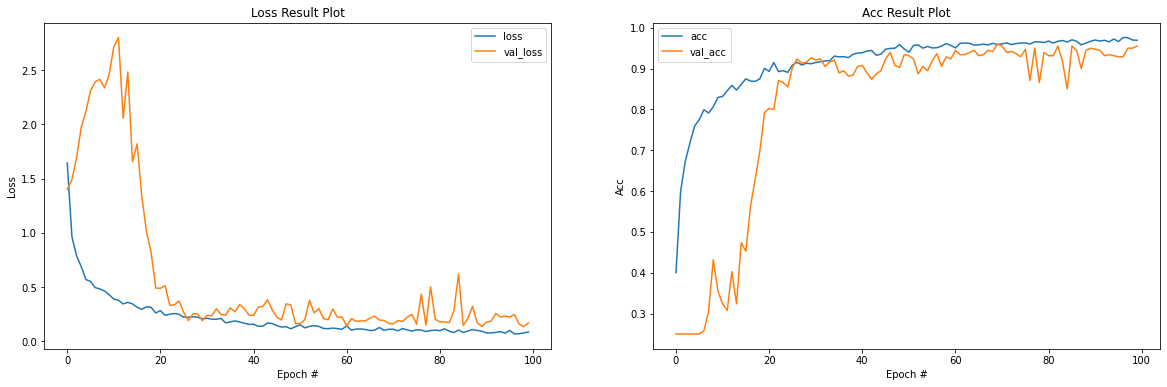

In [ ]:
#plot model 1
fig, (plt1, plt2) = plt.subplots(1,2, figsize=(20,6)) #buat bikin subplot

plt1.figsize=(10,8)
plt1.plot(np.arange(0, 100), H2.history["loss"], label="loss")
plt1.plot(np.arange(0, 100), H2.history["val_loss"], label="val_loss")
plt1.set_title("Loss Result Plot")
plt1.set_xlabel("Epoch #")
plt1.set_ylabel("Loss")
plt1.legend()

plt2.figsize=(10,8)
plt2.plot(np.arange(0, 100), H2.history["accuracy"], label="acc")
plt2.plot(np.arange(0, 100), H2.history["val_accuracy"], label="val_acc")
plt2.set_title("Acc Result Plot")
plt2.set_xlabel("Epoch #")
plt2.set_ylabel("Acc")
plt2.legend()

In [ ]:
#Evaluasi menggunakan classification report
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix


ypred = model2.predict(validation_generator)
prediction2 = np.argmax(ypred, axis=1)
print(classification_report(validation_generator.classes, prediction2))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92        95
           1       1.00      1.00      1.00        95
           2       0.99      1.00      0.99        95
           3       0.99      0.83      0.90        95

    accuracy                           0.96       380
   macro avg       0.96      0.96      0.95       380
weighted avg       0.96      0.96      0.95       380



Confusion matrix, without normalization
[[94  0  0  1]
 [ 0 95  0  0]
 [ 0  0 95  0]
 [15  0  1 79]]


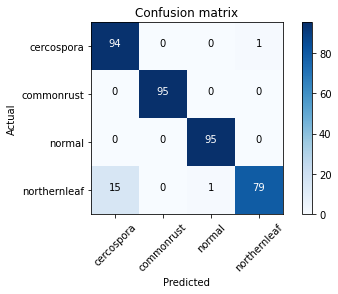

In [ ]:
#Evaluasi menggunakan confusion matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

cnf_matrix=confusion_matrix(validation_generator.classes,prediction2)
plot_confusion_matrix(cnf_matrix, classes=validation_generator.class_indices)